# Machine Learning Final Project: Question 2
## Team members:
 - ## <span style="color:green">521H0489: Hồ Hữu An</span>.
 - ## <span style="color:green">521H0491: Trần Nhựt Anh</span>.
 - ## <span style="color:green">521H0290: Đỗ Minh Quân</span>.

# Library

In [462]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.multioutput import MultiOutputClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier, StackingClassifier, VotingClassifier, BaggingClassifier
import xgboost as xgb

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

# Import data

In [463]:
dataframe = pd.read_csv("../data/data.csv").drop(columns=['id'],axis=1)

In [464]:
print('train_data rows: ',dataframe.shape[0])
print('train_data columns: ',dataframe.shape[1])

train_data rows:  7905
train_data columns:  19


In [465]:
dataframe.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316,3.35,172,1601.0,179.80,63,394,9.7,3,D
1,2574,Placebo,19237,F,N,N,N,N,0.9,364,3.54,63,1440.0,134.85,88,361,11.0,3,C
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299,3.55,131,1029.0,119.35,50,199,11.7,4,D
3,2576,Placebo,18460,F,N,N,N,N,0.6,256,3.50,58,1653.0,71.30,96,269,10.7,3,C
4,788,Placebo,16658,F,N,Y,N,N,1.1,346,3.65,63,1181.0,125.55,96,298,10.6,4,C


In [466]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         7905 non-null   int64  
 1   Drug           7905 non-null   object 
 2   Age            7905 non-null   int64  
 3   Sex            7905 non-null   object 
 4   Ascites        7905 non-null   object 
 5   Hepatomegaly   7905 non-null   object 
 6   Spiders        7905 non-null   object 
 7   Edema          7905 non-null   object 
 8   Bilirubin      7905 non-null   float64
 9   Cholesterol    7905 non-null   int64  
 10  Albumin        7905 non-null   float64
 11  Copper         7905 non-null   int64  
 12  Alk_Phos       7905 non-null   float64
 13  SGOT           7905 non-null   float64
 14  Tryglicerides  7905 non-null   int64  
 15  Platelets      7905 non-null   int64  
 16  Prothrombin    7905 non-null   float64
 17  Stage          7905 non-null   int64  
 18  Status  

# Statistical analysis on data

## `1. Overview statistics`

In [467]:
dataframe.describe().round(2).style.format(precision=2).background_gradient(cmap="Blues")

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,7905.00,7905.00,7905.00,7905.00,7905.00,7905.00,7905.00,7905.00,7905.00,7905.00,7905.00,7905.00
mean,2030.17,18373.15,2.59,350.56,3.55,83.90,1816.75,114.60,115.34,265.23,10.63,3.03
std,1094.23,3679.96,3.81,195.38,0.35,75.90,1903.75,48.79,52.53,87.47,0.78,0.87
min,41.00,9598.00,0.30,120.00,1.96,4.00,289.00,26.35,33.00,62.00,9.00,1.00
25%,1230.00,15574.00,0.70,248.00,3.35,39.00,834.00,75.95,84.00,211.00,10.00,2.00
50%,1831.00,18713.00,1.10,298.00,3.58,63.00,1181.00,108.50,104.00,265.00,10.60,3.00
75%,2689.00,20684.00,3.00,390.00,3.77,102.00,1857.00,137.95,139.00,316.00,11.00,4.00
max,4795.00,28650.00,28.00,1775.00,4.64,588.00,13862.40,457.25,598.00,563.00,18.00,4.00


## `2. Correlation Matrix`

Text(0.5, 1.0, 'Data correlations')

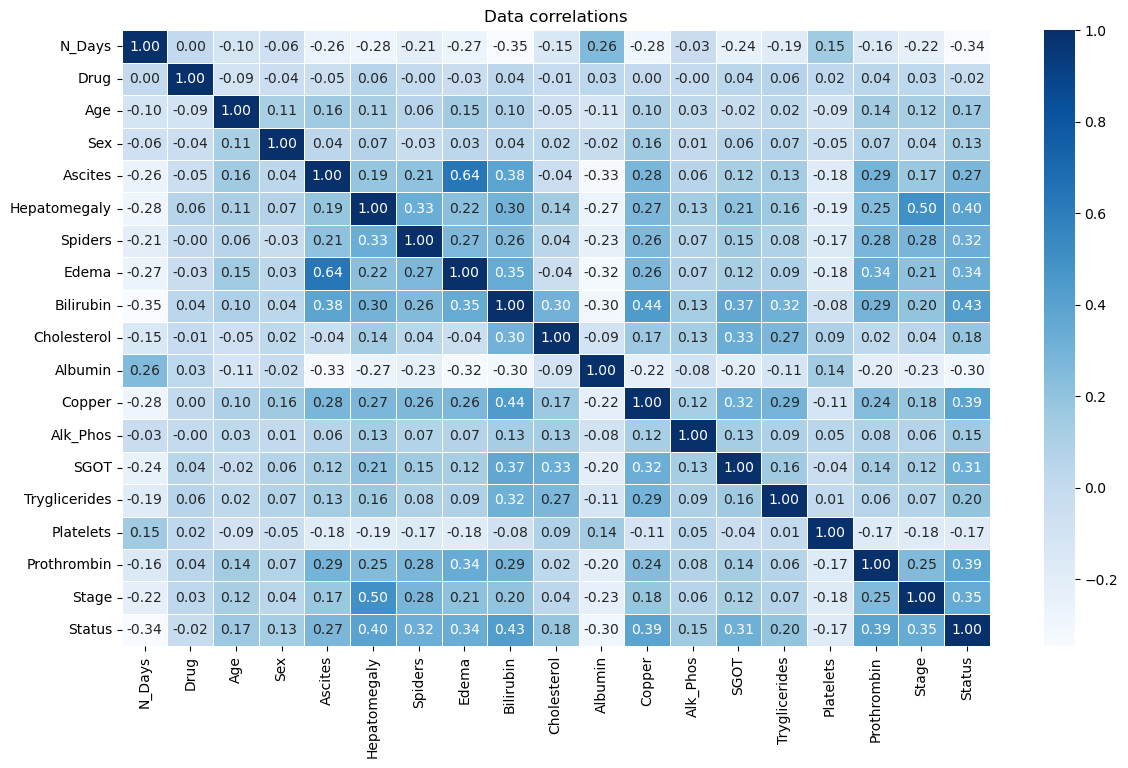

In [468]:
encoded_train = dataframe.copy()

for column in encoded_train.columns:
    if encoded_train[column].dtype == 'object':
        label_encoder = LabelEncoder()
        encoded_train[column] = label_encoder.fit_transform(encoded_train[column])

correlation = encoded_train.corr()
plt.figure(figsize=(14,8))
sns.heatmap(correlation,annot=True,fmt='.2f',annot_kws={'size': 10},linewidths=0.5,cmap='Blues')
plt.title("Data correlations")

## `3. Chart Box`

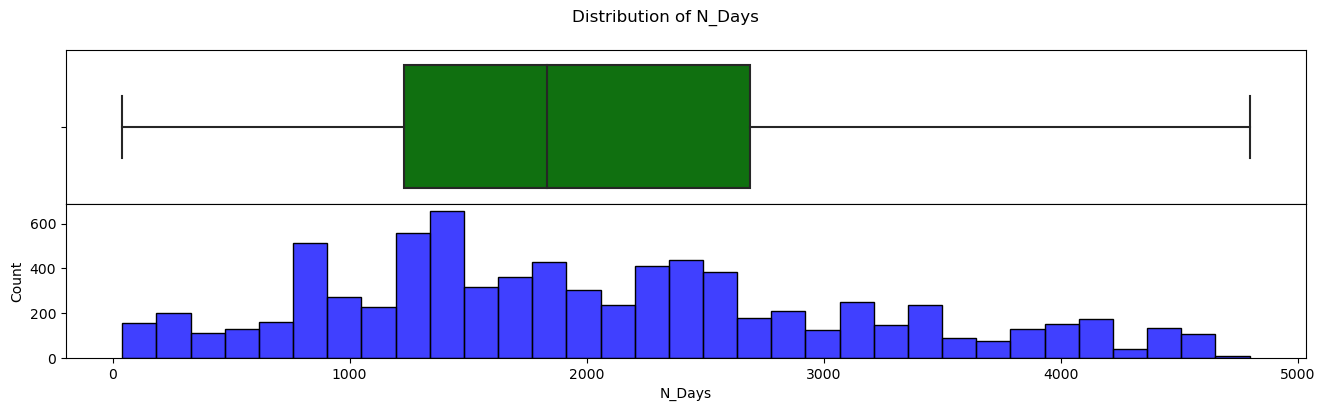

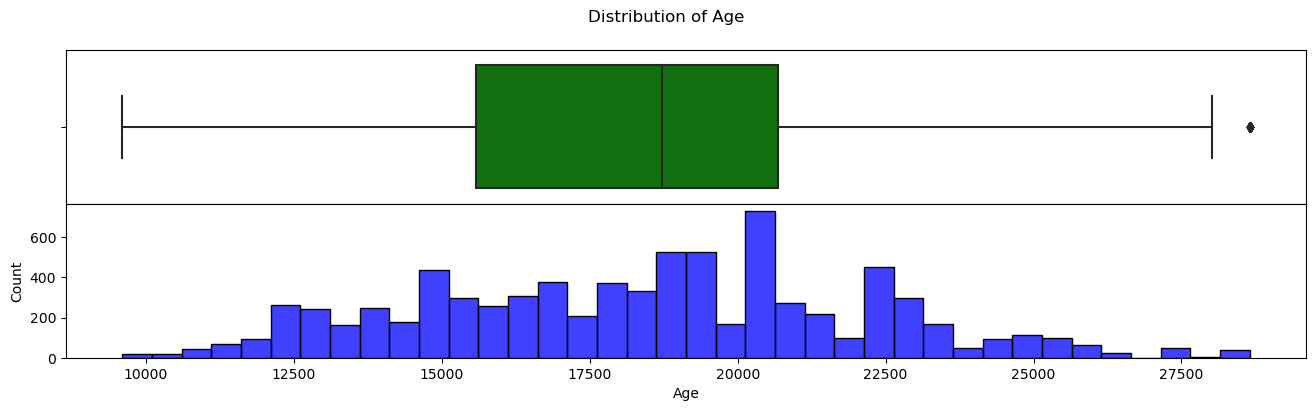

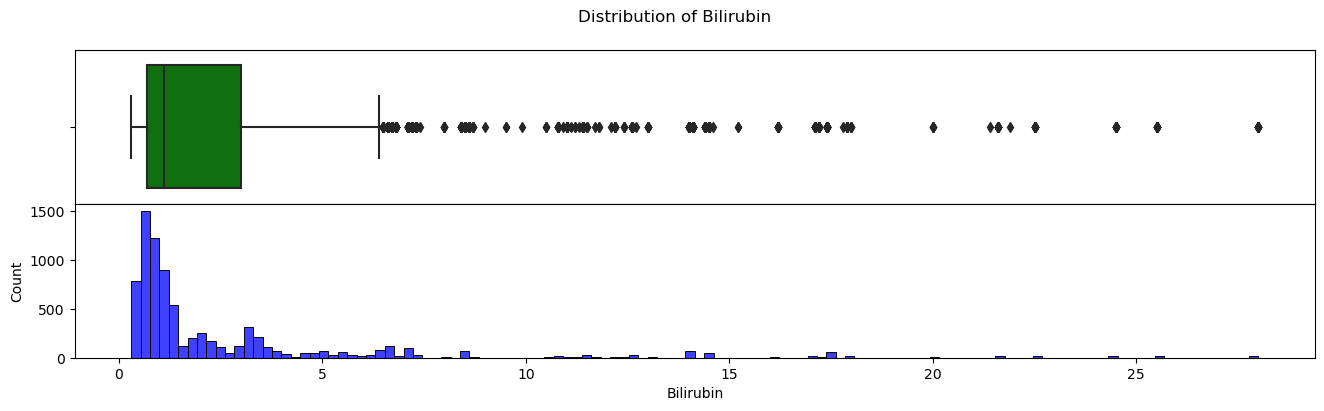

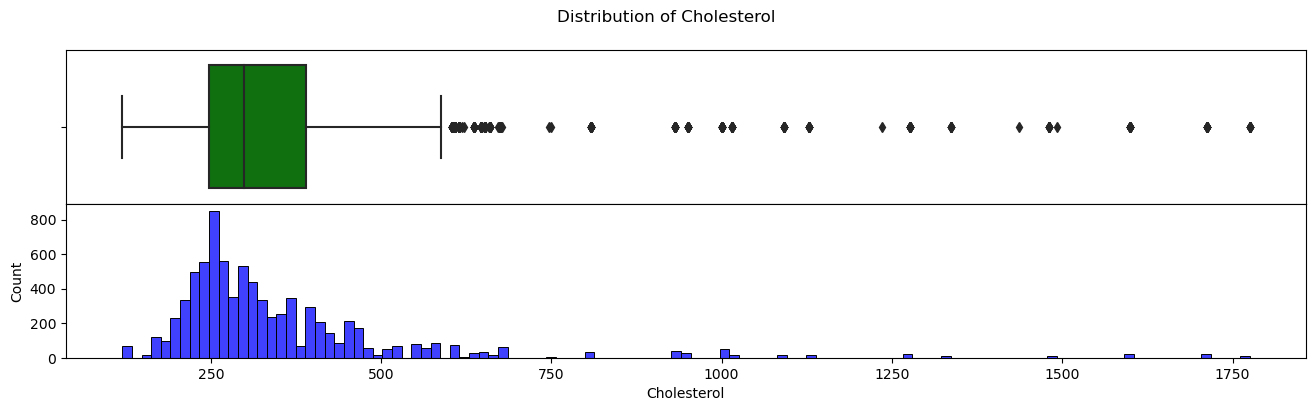

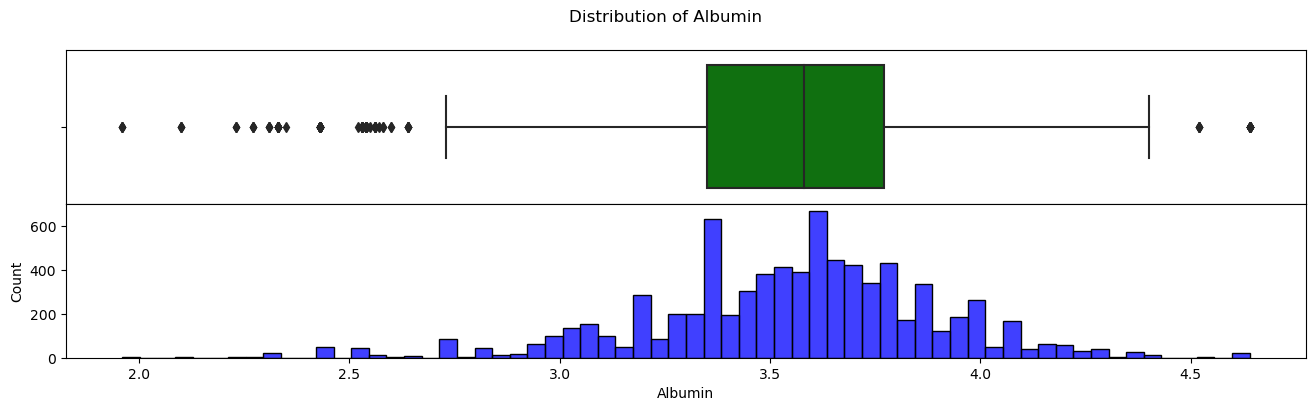

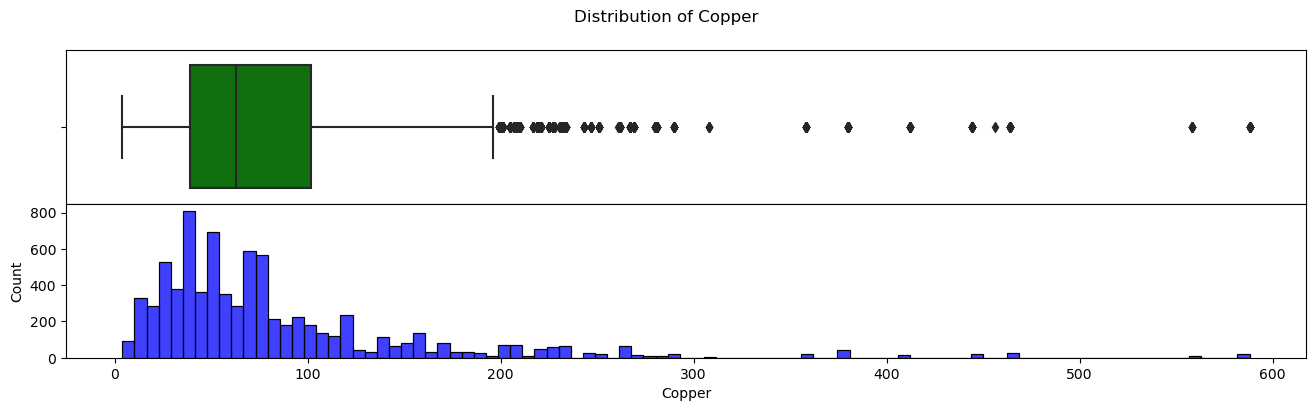

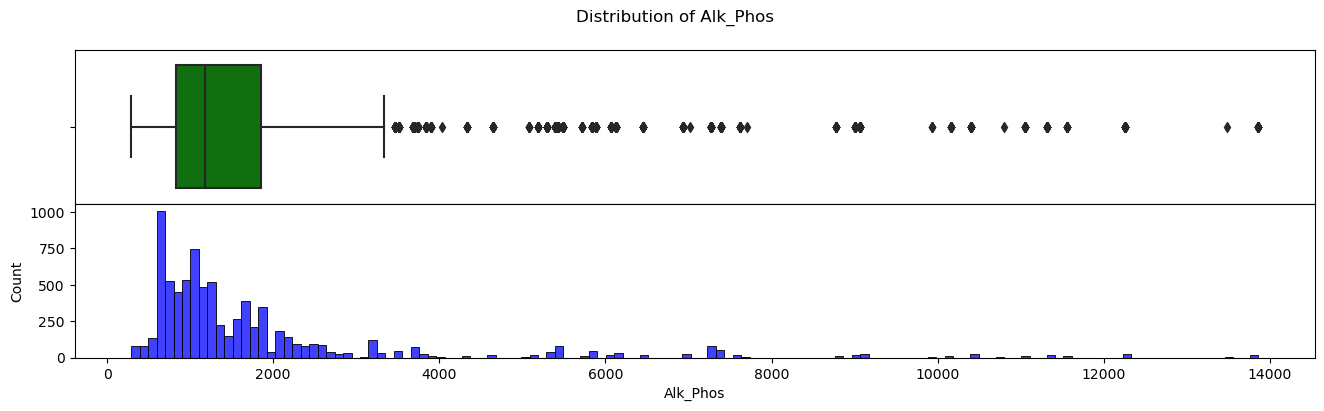

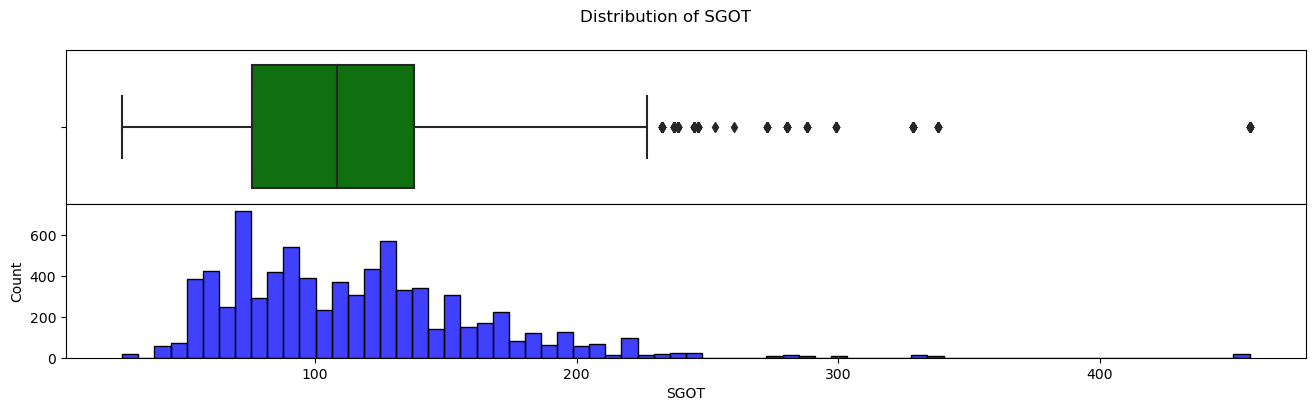

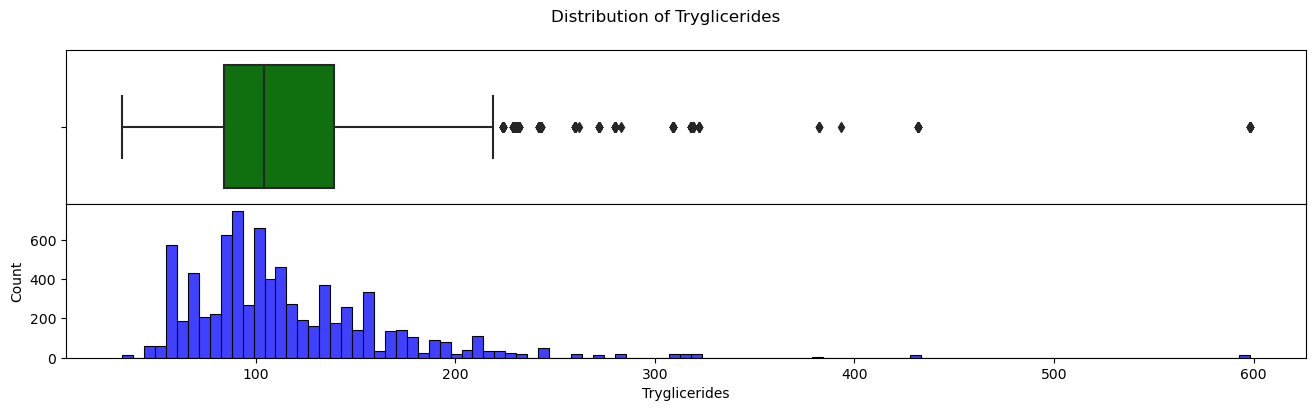

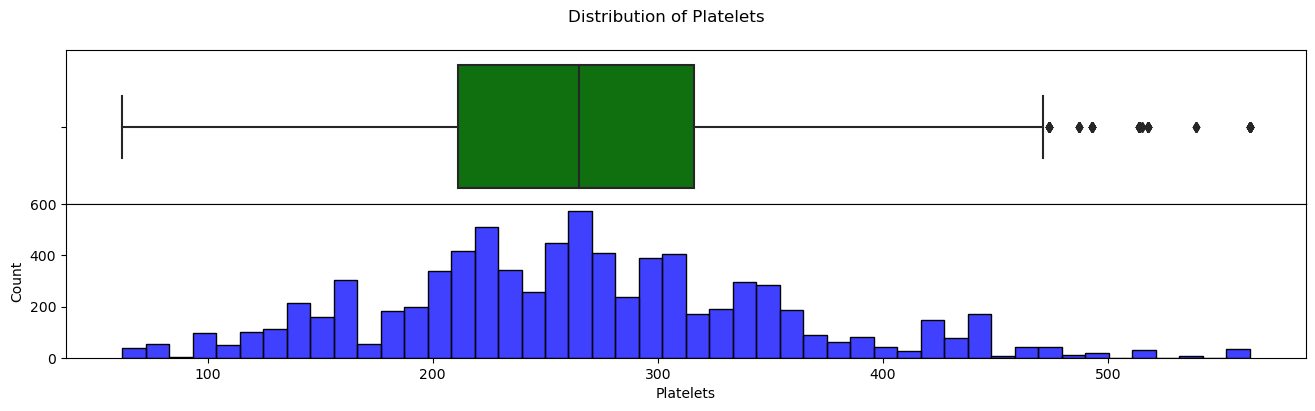

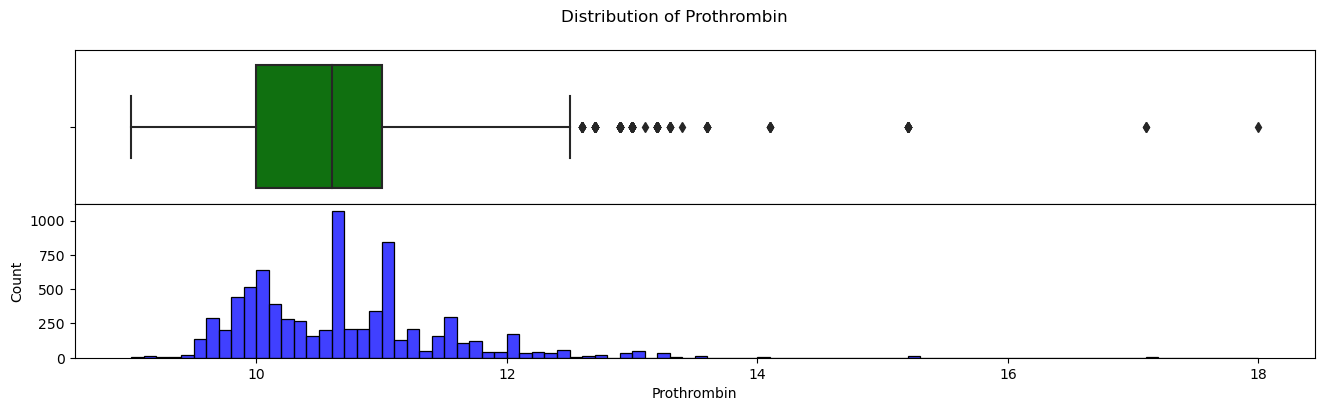

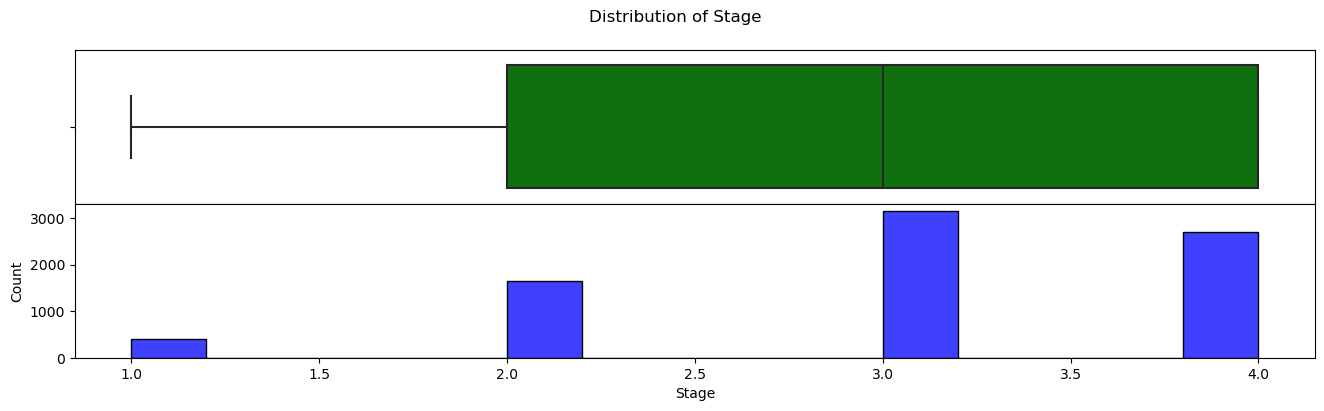

In [469]:
numerical = dataframe.select_dtypes(exclude='object')
n = len(numerical)

for col in numerical:
    fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 4))
    plt.suptitle(f"Distribution of {col}")
    sns.boxplot(data=dataframe, x=col, ax=ax1, color="Green")
    ax1.set_xlabel(None)
    ax1.get_xaxis().set_ticks([])
    sns.histplot(data=dataframe, x=col, ax=ax2, color="Blue")
    plt.subplots_adjust(hspace=0)
    print("\n")
    plt.show()

## `4. Target class imbalance`

Count of each Status:
C     4965
D     2665
CL     275
Name: Status, dtype: int64



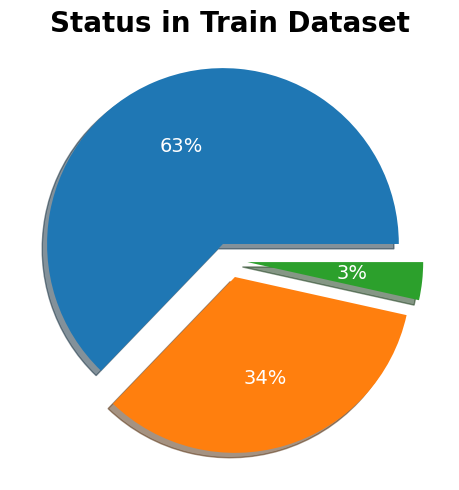

In [470]:
status_counts = dataframe['Status'].value_counts()
print("Count of each Status:")
print(status_counts)
print()

fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.pie(
    dataframe['Status'].value_counts(), 
    shadow=True, 
    explode=[.1 for i in range(dataframe['Status'].nunique())],
    autopct='%1.f%%',
    textprops={'size': 14, 'color': 'white'}
)

ax.set_title('Status in Train Dataset', fontsize=20, fontweight='bold')

plt.tight_layout()
plt.show()

# Medical defenition of the features
Let us take a look at what each feature indicates:

`N_Days`: Number of days betwqeen registration and the earlier of death, transplantation, or study analysis time in July 1986

`Drug`: Type of drug administered to the patient, with options such as D-penicillamine or Placebo.

`Age`: Age of the patient, indicating the chronological age at the time of data collection.

`Sex`: Gender of the patient, with "F" representing females.

`Ascites`: Presence or absence of ascites, a medical condition characterized by fluid accumulation in the abdomen.

`Hepatomegaly`: Presence or absence of hepatomegaly, an enlargement of the liver.

`Spiders`: Presence or absence of spider angiomas, visible blood vessels in a spider-like pattern on the skin.

`Edema`: Presence or absence of edema, which is swelling caused by the accumulation of excess fluid in body tissues.

`Bilirubin`: Bilirubin levels in the blood, an indicator of liver function.

`Cholesterol`: Cholesterol levels in the blood, a measure of lipid metabolism.

`Albumin`: Albumin levels in the blood, an important protein produced by the liver.

`Copper`: Copper levels, which can be relevant to liver function

`Alk_Phos`: Alkaline phosphatase levels in the blood, an enzyme associated with liver and bone function.

`SGOT`: Serum Glutamic Oxaloacetic Transaminase levels, an enzyme indicating liver health.

`Tryglicerides`: Triglycerides levels in the blood, representing another aspect of lipid metabolism.

`Platelets`: Platelet count in the blood, important for blood clotting.

`Prothrombin`: Prothrombin levels, a key component in the blood clotting process.

`Stage`: Stage of the patient's condition, providing information on the severity or progression of cirrhosis.

The above description of the data will help us when looking at the normal range for each feature as shown below:

### The general medical range for the features
All units match the dataset documentation.

Dataset documentation: https://onlinelibrary.wiley.com/doi/epdf/10.1002/9781118150672.app4

Other unmentioned feature have binary values (Sex, Ascites, Hepatomegaly, Spiders, Edema)

`Bilirubin`: 0.1 to 1.2 mg/dl

`Cholesterol`: Less than 200 mg/dl

`Albumin`: 3.5 to 5.5 gm/dl

`Copper`: 10-30 ug/day

`Alkaline Phosphatase`: 40 to 129 U/litre.

`SGOT` (Serum Glutamic Oxaloacetic Transaminase): 8 to 45 U/L

`Triglycerides`: 48.68 to 168.15 mg/dL

`Platelet`: 150-400 unit

`Prothrombin Time`: 9.4 to 12.5 seconds.

# Data preprocessing

## `1 Data encoding`

In [471]:
dataframe = pd.get_dummies(dataframe, columns=['Status'])
dataframe

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,...,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status_C,Status_CL,Status_D
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316,...,172,1601.0,179.80,63,394,9.7,3,0,0,1
1,2574,Placebo,19237,F,N,N,N,N,0.9,364,...,63,1440.0,134.85,88,361,11.0,3,1,0,0
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299,...,131,1029.0,119.35,50,199,11.7,4,0,0,1
3,2576,Placebo,18460,F,N,N,N,N,0.6,256,...,58,1653.0,71.30,96,269,10.7,3,1,0,0
4,788,Placebo,16658,F,N,Y,N,N,1.1,346,...,63,1181.0,125.55,96,298,10.6,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,1166,D-penicillamine,16839,F,N,N,N,N,0.8,309,...,38,1629.0,79.05,224,344,9.9,2,1,0,0
7901,1492,Placebo,17031,F,N,Y,N,N,0.9,260,...,62,1440.0,142.00,78,277,10.0,4,1,0,0
7902,1576,D-penicillamine,25873,F,N,N,Y,S,2.0,225,...,51,933.0,69.75,62,200,12.7,2,0,0,1
7903,3584,D-penicillamine,22960,M,N,Y,N,N,0.7,248,...,32,1003.0,57.35,118,221,10.6,4,0,0,1


In [472]:
le = LabelEncoder()
dataframe = dataframe.apply(le.fit_transform)
dataframe

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,...,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status_C,Status_CL,Status_D
0,97,0,305,1,0,0,0,0,20,97,...,123,227,162,13,195,7,2,0,0,1
1,350,1,228,0,0,0,0,0,6,128,...,52,210,121,38,182,20,2,1,0,0
2,414,1,57,0,0,1,1,2,30,87,...,105,130,102,4,68,27,3,0,0,1
3,351,1,201,0,0,0,0,0,3,56,...,48,237,30,46,119,17,2,1,0,0
4,69,1,138,0,0,1,0,0,8,118,...,52,174,109,46,140,16,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,118,0,145,0,0,0,0,0,5,93,...,30,233,40,134,175,9,1,1,0,0
7901,193,1,154,0,0,1,0,0,6,60,...,51,210,131,28,124,10,3,1,0,0
7902,205,0,380,0,0,0,1,1,17,36,...,43,106,27,12,69,37,1,0,0,1
7903,423,0,342,1,0,1,0,0,4,50,...,24,124,18,67,85,16,3,0,0,1


## `2 Data Splitting`

In [473]:
X = dataframe.drop(columns=['Status_C', 'Status_D', 'Status_CL'], axis =1)
y = dataframe[['Status_C', 'Status_D', 'Status_CL']]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [474]:
X_train

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
6703,116,1,82,0,0,1,0,0,11,152,115,68,120,69,7,95,9,2
5815,182,1,81,0,0,0,0,0,5,190,69,66,120,99,111,147,5,1
3429,378,1,86,0,0,0,0,0,3,190,71,67,120,99,111,158,5,1
2405,31,0,325,0,0,1,0,0,6,126,99,101,257,144,95,45,20,1
1410,428,1,279,0,0,1,1,0,33,161,59,54,145,21,130,18,27,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,41,1,146,0,0,0,0,0,30,107,80,146,335,10,49,63,14,2
5390,54,0,157,0,0,1,1,0,6,88,54,148,252,117,49,156,11,3
860,66,1,141,0,0,1,0,0,5,69,98,40,74,10,131,119,16,3
7603,339,0,172,0,0,0,0,0,8,56,87,34,164,35,44,64,15,3


In [475]:
y_train

,Status_C,Status_D,Status_CL
6703,0,0,1
5815,1,0,0
3429,1,0,0
2405,1,0,0
1410,0,1,0
...,...,...,...
5226,0,1,0
5390,0,1,0
860,1,0,0
7603,1,0,0


# Basic Model

## `Logistic Regression`

In [476]:
LR = LogisticRegression()
multi_classifier = MultiOutputClassifier(LR)
multi_classifier.fit(X_train, y_train)

MultiOutputClassifier(estimator=LogisticRegression())

In [477]:
predictions = multi_classifier.predict(X_test)

## `KNN`

In [478]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, y_train)

KNeighborsClassifier()

## `Decision Trree`

In [479]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier()

## `Naive Bayes`

In [480]:
GNB = GaussianNB()
multi_gnb = MultiOutputClassifier(GNB)
multi_gnb.fit(X_train, y_train)

MultiOutputClassifier(estimator=GaussianNB())

## `SVM`

In [481]:
svm = SVC()
multi_svm = MultiOutputClassifier(svm)
multi_svm.fit(X_train, y_train)

MultiOutputClassifier(estimator=SVC())

## `Perceptron`

In [482]:
perceptron = Perceptron()
multi_perceptron = MultiOutputClassifier(perceptron)
multi_perceptron.fit(X_train, y_train)

MultiOutputClassifier(estimator=Perceptron())

# Ensemble Learing

## `Bagging`

In [483]:
bagging = BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=42)
multi_bagging = MultiOutputClassifier(bagging)
multi_bagging.fit(X_train, y_train)

MultiOutputClassifier(estimator=BaggingClassifier(base_estimator=SVC(),
                                                  random_state=42))

## `Voting`

In [485]:
voting = VotingClassifier(estimators=[('ada', AdaBoostClassifier()), ('rf', RandomForestClassifier()), ('logreg', LogisticRegression())], voting='hard')
multi_voting = MultiOutputClassifier(voting)
multi_voting.fit(X_train, y_train)

MultiOutputClassifier(estimator=VotingClassifier(estimators=[('ada',
                                                              AdaBoostClassifier()),
                                                             ('rf',
                                                              RandomForestClassifier()),
                                                             ('logreg',
                                                              LogisticRegression())]))

## `Stacking`

In [487]:
stacking = StackingClassifier(estimators=[('ada', AdaBoostClassifier()), ('rf', RandomForestClassifier())], final_estimator=LogisticRegression())
multi_stacking = MultiOutputClassifier(stacking)
multi_stacking.fit(X_train, y_train)

MultiOutputClassifier(estimator=StackingClassifier(estimators=[('ada',
                                                                AdaBoostClassifier()),
                                                               ('rf',
                                                                RandomForestClassifier())],
                                                   final_estimator=LogisticRegression()))

## `Gradient Boosting Machines`

In [ ]:
GBM = GradientBoostingClassifier()
multi_GBM = MultiOutputClassifier(GBM)
multi_GBM.fit(X_train, y_train)

MultiOutputClassifier(estimator=GradientBoostingClassifier())

## `Random Forest`

In [ ]:
RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## `Adaboost`

In [ ]:
ADA = AdaBoostClassifier(n_estimators=50)
multi_ADA = MultiOutputClassifier(ADA)
multi_ADA.fit(X_train, y_train)

MultiOutputClassifier(estimator=AdaBoostClassifier())

## `XGBoost`

In [ ]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# Feed Forward Neural Network

# Feed Forward Neural Network